# 2.2.7 [Challenge: Feedback Analysis](https://courses.thinkful.com/data-201v1/project/2.2.7)

Sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Data from [sentiment labelled sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)
Dataset created for the paper [From Group to Individual Labels using Deep Features](http://mdenil.com/media/papers/2015-deep-multi-instance-learning.pdf)

Directions:
* Pick one of the company data files and build your own classifier
* When you're satisfied with its performance using hte accuracy measure shown in the example
* Test model on the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process.

### Featuring Engineering & Selection
To pick words to pull out of the imdb dataset I read through a few positive and negative reviews and added emotionally charged words to the keyword list. There were also some phrases that seemed to align with with positive or negative entertainment reiews (e.g. 'edge of my seat', 'classic', 'suspense') After adding these I did a count of how frequently they appeared in reviews, if I saw that they were rare occurances I removed them because it felt like I was overfitting to the specific dataset/film reviews that I had. Then I attached the y_pred to the original dataset to look at which words were present when a review was miscategorized and removed those.

Also I found that when I ran the yelp reviews on the origingal model before I removed low occuring words the mislabed rate ws much higher than after I removed these. The accuracy of the imdb score decreased a little after removing these but only slightly.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB

In [2]:
# Grab and proces raw data
sentiment = pd.read_csv('unit_2_data/sentiment_sentences/imdb_labelled.txt', 
            delimiter= '\t', header=None)
sentiment.columns = ['message', 'positive']

yelp = pd.read_csv('unit_2_data/sentiment_sentences/imdb_labelled.txt', 
            delimiter= '\t', header=None)
yelp.columns = ['message', 'positive']

In [7]:
yelp.groupby('positive').describe()

message                                              
           count unique                               top freq
positive                                                      
0            362    361                Not recommended.      2
1            386    384  Definitely worth checking out.      2

In [11]:
list(sentiment[sentiment['positive']==1].message)

['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
 'Saw the movie today and thought it was a good effort, good messages for kids.  ',
 'Loved the casting of Jimmy Buffet as the science teacher.  ',
 'And those baby owls were adorable.  ',
 "The movie showed a lot of Florida at it's best, made it look very appealing.  ",
 'The Songs Were The Best And The Muppets Were So Hilarious.  ',
 'It Was So Cool.  ',
 'This is a very "right on case" movie that delivers everything almost right in your face.  ',
 'This review is long overdue, since I consider A Tale of Two Sisters to be the single greatest film ever made.  ',
 "I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
 'It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
 "This if the first movie I've given a 10 to in 

In [112]:
sentiment = pd.read_csv('unit_2_data/sentiment_sentences/imdb_labelled.txt', 
            delimiter= '\t', header=None)
sentiment.columns = ['message', 'positive']

keywords = ['classic', 'not worth', 'the best', 'not', 'film', 'enjoy', 'well done', 'journey',
            'perfect', 'loved', 'not recommend', 'good', 'great', 'best', 
            'fans',  'entertaining', 'love', 'suspense', 'terrific', 'touching', 'edge', 
            'must see', '10', 'touching', 'fun', 'hours', 'smart', 'bad', 'waste', 'flat', 'wasted', 'disappointed', 
            'embarrassing', 'predictable', 'cannot', 'could not', 'flawed', 'stupid', 
            'worst', 'worse', 'disliked', 'nothing','hate', 'too many', 'poor',
          'crap', 'cheap', '1'
            ]
for key in keywords:
    sentiment[str(key)] = sentiment.message.str.contains(
    ' ' + str(key) + ' ',
    case=False
    )

In [98]:
messages = sentiment[sentiment['good']==True].message
for message in messages:
    print(message)

Saw the movie today and thought it was a good effort, good messages for kids.  
 The structure of this film is easily the most tightly constructed in the history of cinema.  	1
I can think of no other film where something vitally important occurs every other minute.  	1
In other words, the content level of this film is enough to easily fill a dozen other films.  	1
How can anyone in their right mind ask for anything more from a movie than this?  	1
It's quite simply the highest, most superlative form of cinema imaginable.  	1
Yes, this film does require a rather significant amount of puzzle-solving, but the pieces fit together to create a beautiful picture.  	1
This short film certainly pulls no punches.  	0
Graphics is far from the best part of the game.  	0
This is the number one best TH game in the series.  	1
It deserves strong love.  	1
It is an insane game.  	1
There are massive levels, massive unlockable characters... it's just a massive game.  	1
Waste your money on this game. 

In [101]:
sentiment.groupby('positive').sum().transpose().sort_values(by=0, ascending=False)

positive,0,1
film,31.0,52.0
bad,31.0,5.0
not,30.0,15.0
good,12.0,26.0
waste,11.0,1.0
worst,9.0,0.0
worse,7.0,0.0
nothing,7.0,0.0
stupid,7.0,0.0
great,6.0,22.0


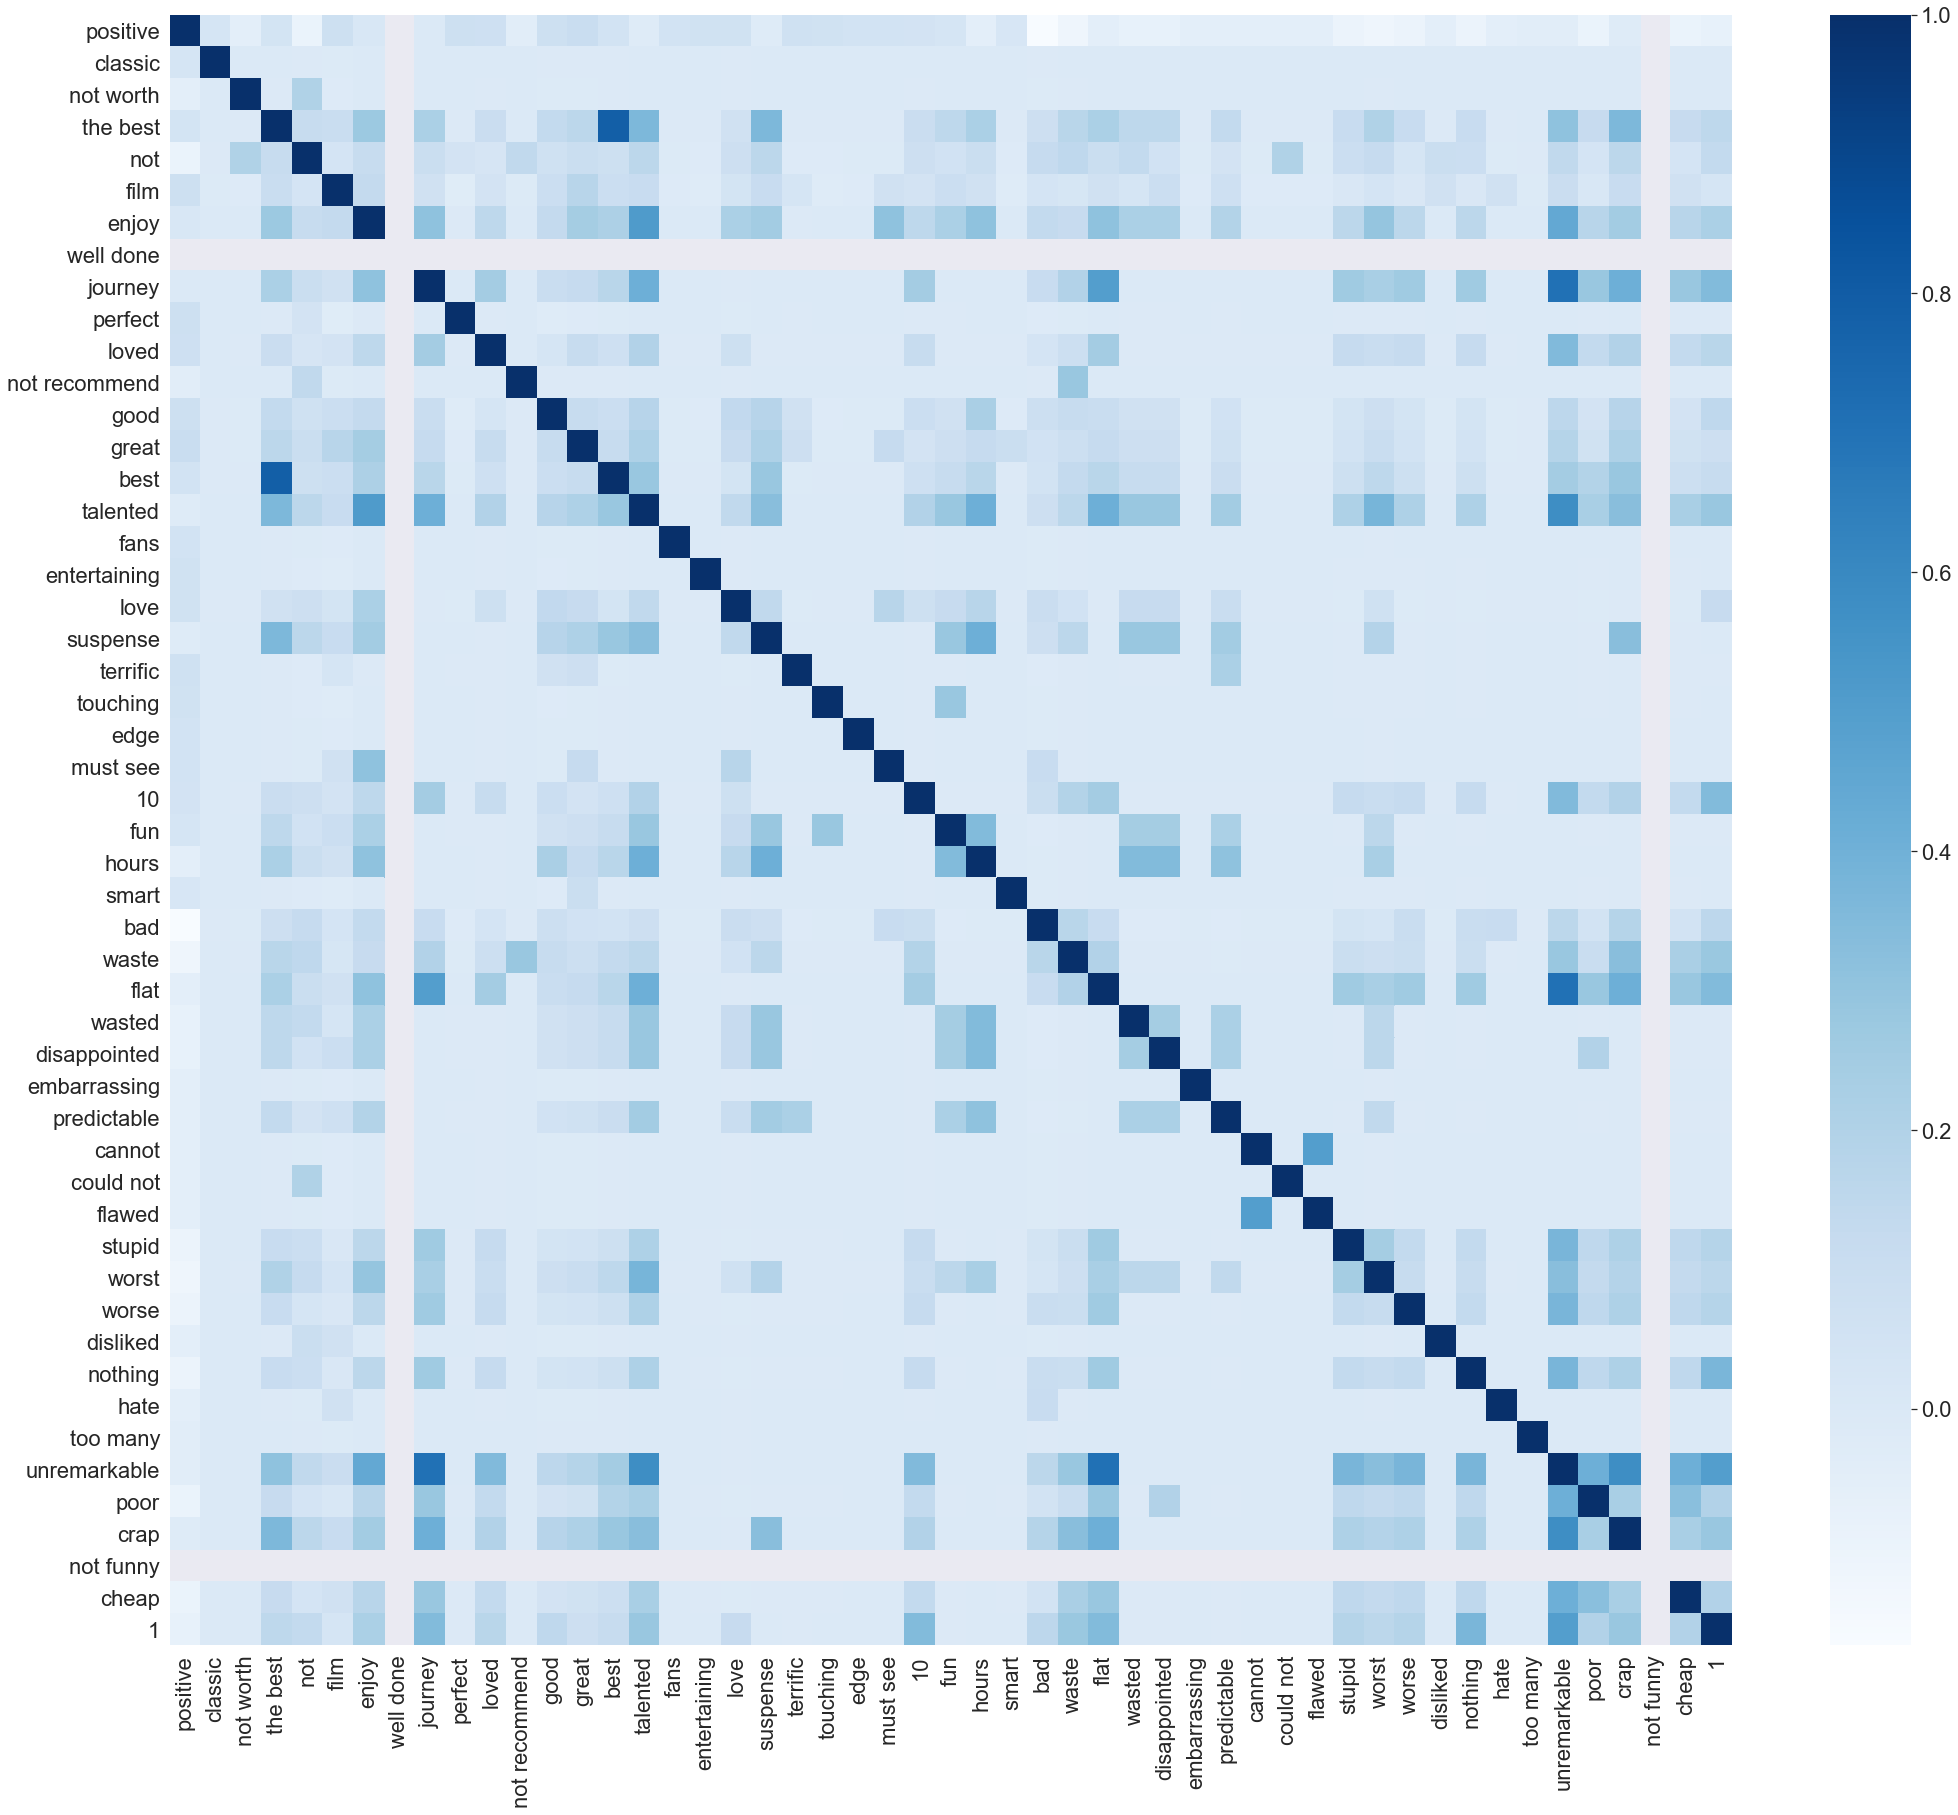

In [111]:
plt.subplots(figsize=(35,30))
ax = sns.set(font_scale=2)
ax = sns.heatmap(sentiment.corr(), cmap= "Blues")

In [113]:
data = sentiment[keywords]
target = sentiment['positive']

In [114]:
# Data is boulean/binary so can user BernoulliNB again
# Instantiate our model and store it in a new variable
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable
sentiment['y_pred'] = bnb.predict(sentiment[keywords])

#Display Results
print("Number of mislabeled points out of a total {} points : {}, correctly labeled rate {}".format(
    data.shape[0],
    (target!= sentiment['y_pred']).sum(),
    (target== sentiment['y_pred']).sum()/data.shape[0]
))

Number of mislabeled points out of a total 748 points : 267, correctly labeled rate 0.643048128342246


In [93]:
sentiment.groupby('positive').mean()['y_pred']

positive
0    0.767956
1    0.989637
Name: y_pred, dtype: float64

In [115]:
yelp = pd.read_csv('unit_2_data/sentiment_sentences/yelp_labelled.txt', 
            delimiter= '\t', header=None)
yelp.columns = ['message', 'positive']

for key in keywords:
    yelp[str(key)] = yelp.message.str.contains(
    ' ' + str(key) + ' ',
    case=False
    )

y_pred_yelp = bnb.predict(yelp[keywords])   

#Display Results
print("Number of mislabeled points out of a total {} points : {}, rate correctly assigned: {}".format(
    yelp.iloc[:,2:].shape[0],
    (yelp['positive']!= y_pred_yelp).sum(),
    (yelp['positive']== y_pred_yelp).sum()/yelp.iloc[:,2:].shape[0] ))

Number of mislabeled points out of a total 1000 points : 393, rate correctly assigned: 0.607


In [116]:
#Display Results
amazon = pd.read_csv('unit_2_data/sentiment_sentences/amazon_cells_labelled.txt', 
            delimiter= '\t', header=None)
amazon.columns = ['message', 'positive']

for key in keywords:
    amazon[str(key)] = amazon.message.str.contains(
    ' ' + str(key) + ' ',
    case=False
    )

y_pred_amazon = bnb.predict(amazon[keywords])   

#Display Results
print("Number of mislabeled points out of a total {} points : {}, rate correctly assigned: {}".format(
    amazon.iloc[:,2:].shape[0],
    (amazon['positive']!= y_pred_amazon).sum(),
    (amazon['positive']== y_pred_amazon).sum()/amazon.iloc[:,2:].shape[0] ))

Number of mislabeled points out of a total 1000 points : 380, rate correctly assigned: 0.62
